# Classification of Active Sites using Neural Network

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)

template by: AhmetSacan. 

In this assignment, you are going to predict catalytic residues in proteins 
using sequence and structural information. The dataset (courtesy of Natalia 
Petrova) is a subset of the data used in "Prediction of catalytic residues 
using Support Vector Machine with selected protein sequence and structural 
properties", Natalia Petrova and Cathy Wu, 2006. http://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-312

Please review that publication to learn more about this dataset and the catalytic residue prediction problem.

In [1]:
%load_ext autoreload
%autoreload 2

# Import necessary libraries
from sklearn.model_selection import KFold
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import loadcatsite
from loadcatsite import loadcatsite

2023-02-27 18:08:59.954294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 18:09:00.232662: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-27 18:09:01.056784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/home/muaddib/.conda/envs/keras/lib/
2023-02-27 18:09:01.056920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 

## Load the data

Get the data using the loadcatsite() function. No changes needed for this 
section. You need to have a `loadcatsite.py` file available in the same folder.

In [2]:
# Load data
X, T, names = loadcatsite()

## General Guidelines

- Do not show the Network GUI. You may show the GUI when you are developing
  and testing your code; your final code and report should not contain the GUI.
- Do not use any validation set when training the network.
- You may use any number of hidden units in your final code. You may try 
  different numbers of hidden units to decide how many hidden units you want to
  use, but you do not need to include code to that effect.

## Train a network for classification using all features

Use only one of the training & test subsets of the cross-validation sets when 
reporting training & test accuracies in this section.

In [3]:
# NUMHIDDEN variable should control how many hidden units you are using for
# this network.
NUMHIDDEN = 10;

# KFOLD variable should control how many cross-validation sets are used. The
# rest of your code should work correctly if the value of this variable is
# modified. 
KFOLD = 3;

## Set up the cross-validation indices

- Use only the first cross-validation set to divide the dataset into training
  and testing.
- Create the network, set its parameters, and train on the training set.
- Test the network on the test data.
- Report the test accuracy.
- No repetitions needed for this section,

In [4]:
# Use only the first cross-validation set to divide the dataset into training and testing.
kf = KFold(n_splits=KFOLD, shuffle=True, random_state=0)
train_idx, test_idx = next(kf.split(X))
X_train, X_test = X[train_idx], X[test_idx]
T_train, T_test = T[train_idx], T[test_idx]

# Create the network, set its parameters, and train on the training set.
net = Sequential([
    Dense(units=NUMHIDDEN, activation='sigmoid', input_dim=X.shape[1]),  # Hidden layer
    Dense(units=1, activation='sigmoid')  # Output layer
])
net.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], 
)
net.fit(X_train, T_train, epochs=200, verbose=0)

# Test the network on the test data.
loss, accuracy = net.evaluate(X_test, T_test, verbose=0)   

# Report the test accuracy.
print('Test accuracy: {:.2f}%'.format(accuracy * 100))

# No repetitions needed for this section

2023-02-27 18:09:04.328829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-27 18:09:04.349045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-27 18:09:04.349206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-27 18:09:04.350093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Test accuracy: 87.50%


## Train a network for classification using a subset of the features

Create a subset of the dataset that includes only the following features:
amino acid P, amino acid V, nearest_cleft_distance, and ScoreConsScore.

Report cross-validated training and test accuracies on this new dataset. You
must report average accuracies across multiple repetitions and across all
cross-validation sets.

```psuedocode
foreach repetition
    set up the cross-validation indices
    foreach cross-validation set
        train & test the network
    end
    calculate and store the training and test accuracies for this repetition
    ignore the fact that there may be different number of samples in each fold
end
```

In [5]:
# NUMHIDDEN variable should control how many hidden units you are using for
# this network.
NUMHIDDEN = 10;

# KFOLD variable should control how many cross-validation sets are used. The
# rest of your code should work correctly if the value of this variable is
# modified. 
KFOLD = 3;

# NUMREPEATS variable should control how many times you repeat through all
# of the cross-validation sets.
NUMREPEATS = 4;

# Create a subset of data including only 4 features
cols = ['AminoAcidP', 'AminoAcidV', 'nearest_cleft_distance', 'ScoreConsScore']
X_sub = X[:, [names.index(col) for col in cols]]

# Define the model with only 4 input features
net = Sequential([
    Dense(units=NUMHIDDEN, activation='sigmoid', input_dim=X_sub.shape[1]),  # Hidden layer
    Dense(units=1, activation='sigmoid')  # Output layer
])
net.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], 
)

In [6]:
# Store accuracies
accuracies = {
    'train': np.zeros((NUMREPEATS, KFOLD)),
    'test': np.zeros((NUMREPEATS, KFOLD)),
}

for i in range(NUMREPEATS):
    # Iniitalize cross-validation
    kf = KFold(n_splits=KFOLD, shuffle=True, random_state=i)

    for j, (train_idx, test_idx) in enumerate(kf.split(X_sub)):
        # Split the data into training and testing
        X_train, X_test = X_sub[train_idx], X_sub[test_idx]
        T_train, T_test = T[train_idx], T[test_idx]

        # Train the network
        net.fit(X_train, T_train, epochs=200, verbose=0)

        # Test the network on the training data
        loss, accuracy = net.evaluate(X_train, T_train, verbose=0)
        accuracies['train'][i, j] = accuracy

        # Test the network on the test data
        loss, accuracy = net.evaluate(X_test, T_test, verbose=0)
        accuracies['test'][i, j] = accuracy

After you complete all repetitions,

- Report the average training accuracy across all repetitions.
- Report the average test accuracy across all repetitions.
- Show distribution of training and test accuracies across all repetitions and
  cross-folds in a boxplot.

Average training accuracy: (81.26 ± 0.82) %
Average test accuracy: (81.07 ± 1.62) %


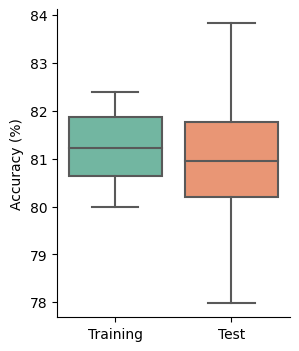

In [7]:
# Report average accuracies
print('Average training accuracy: ({:.2f} ± {:.2f}) %'.format(accuracies['train'].mean() * 100, accuracies['train'].std() * 100))
print('Average test accuracy: ({:.2f} ± {:.2f}) %'.format(accuracies['test'].mean() * 100, accuracies['test'].std() * 100))

# Boxplot of accuracies
fig, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(
    data=[accuracies['train'].ravel()*100, accuracies['test'].ravel()*100], 
    palette='Set2',
    ax=ax
)
sns.despine()
ax.set_xticklabels(['Training', 'Test'])
ax.set_ylabel('Accuracy (%)');